In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network

from os import listdir
from os.path import isfile, join

from sklearn.datasets import load_digits  

# For picture manipulation
from PIL import Image

# For creating directories
import os

### Getting list of files in dir

In [70]:
folder = "tests"
file_list = [f for f in listdir(folder) if isfile(join(folder, f))]

In [77]:
if("tests.csv" in file_list):
    file_list.remove("tests.csv")
file_list

['test0.png', 'test1.png', 'test2.png']

### Scaling Down Images

In [79]:
# Scales all images down to 28x28 to match the mnist dataset
images_scaled = []
for file in file_list:
    mypath = folder + "/" + file
    # Getting original file
    image = Image.open(mypath)
    # Scaling image down
    images_scaled.append(image.resize((28, 28)))

In [80]:
images_scaled

[<PIL.Image.Image image mode=RGBA size=28x28 at 0x1A219BD0D0>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A219CB910>,
 <PIL.Image.Image image mode=RGBA size=28x28 at 0x1A218E4210>]

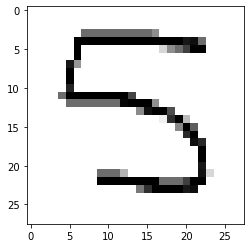

In [81]:
plt.imshow(images_scaled[0], cmap=plt.cm.binary)

In [83]:
# Turning images into numerical values representing
#  brightness of each pixel
digits_mono = []
for i in images_scaled:
    digits_mono.append(np.asarray( i, dtype="int32" ))

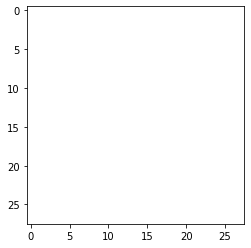

In [95]:
plt.imshow(digits_mono[0], cmap=plt.cm.binary)

In [96]:
# Correcting digit pixel values from 0-255 (dark->bright), to 0-255 (bright->dark)
digits_scaled = digits_mono.copy()
for digit in range(len(digits_scaled)):
    print(digits_scaled[digit])
    for row in range(len(digits_scaled[digit])):
        for val in range(len(digits_scaled[digit][row])):
            digits_scaled[digit][row][val] = (digits_scaled[digit][row][val]*-1)+255

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[[0 0 0 0]
  [0 0 0 0]
  [0

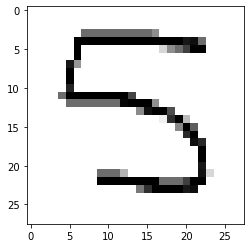

In [97]:
plt.imshow(digits_scaled[0], cmap=plt.cm.binary)

In [102]:
# Reshaping digits
digits_shaped = digits_scaled.copy()
for digit in range(len(digits_scaled)):
        digits_shaped[digit] = digits_shaped[digit].reshape(-1,28*28)

In [103]:
digits_shaped[0] 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [100]:
digits_shaped

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32)]

In [105]:
df = pd.DataFrame([digits_shaped[0] for i in range(len(digits_shaped))])
df.to_csv("tests/tests.csv")

ValueError: Must pass 2-d input

In [108]:
digits_shaped[0][0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [54]:
plt.imshow(digits_shaped[0][4].reshape(28,28, order="C"), cmap=plt.cm.binary)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [55]:
digits_shaped

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=int32)]

In [33]:
np.array(df.iloc[0]).reshape(28,28, order="C")

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [27]:
np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])